In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn import preprocessing

In [2]:
df = pd.read_csv('diabetes.csv')
X = df.drop('Outcome',axis=1)
y = df['Outcome']
X_col=X.columns
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1,stratify=y)

In [4]:
BaggingClassifier()

BaggingClassifier()

In [5]:
#Fit 100 trees and bag them
tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, random_state=0,oob_score=True)
bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  oob_score=True, random_state=0)

In [6]:
y_pred=bag.predict(X_test)
print('Test Accuracy:', accuracy_score(y_test, y_pred),'Oob Accuracy:',bag.oob_score_)

Test Accuracy: 0.7337662337662337 Oob Accuracy: 0.758957654723127


In [7]:
lr=LogisticRegression(max_iter=1000)
bag = BaggingClassifier(lr, n_estimators=100, random_state=0,oob_score=True)
bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000),
                  n_estimators=100, oob_score=True, random_state=0)

In [8]:
bag.oob_score_

0.7817589576547231

In [9]:
y_pred=bag.predict(X_test)
accuracy_score(y_test,y_pred)

0.7792207792207793

In [10]:
#Fit random forests
clf=RandomForestClassifier(random_state=0,n_estimators=100,oob_score=True)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Test Accuracy:', accuracy_score(y_test, y_pred),'Oob Accuracy:',clf.oob_score_)

Test Accuracy: 0.7662337662337663 Oob Accuracy: 0.755700325732899


In [11]:
#Let's try different numbers of trees
Oob_Accuracy=[]
for i in np.linspace(start = 50, stop = 500, num = 10):
    clf=RandomForestClassifier(random_state=0,n_estimators=int(i),oob_score=True)
    clf.fit(X_train,y_train)
    Oob_Accuracy.append([i,np.array(clf.oob_score_)])
df = pd.DataFrame(Oob_Accuracy,columns=['Number_of_Trees','Oob Accuracy'])
df

,Number_of_Trees,Oob Accuracy
0,50.0,0.7345276872964169
1,100.0,0.755700325732899
2,150.0,0.762214983713355
3,200.0,0.7638436482084691
4,250.0,0.7736156351791531
5,300.0,0.7736156351791531
6,350.0,0.7785016286644951
7,400.0,0.7719869706840391
8,450.0,0.7719869706840391
9,500.0,0.7736156351791531


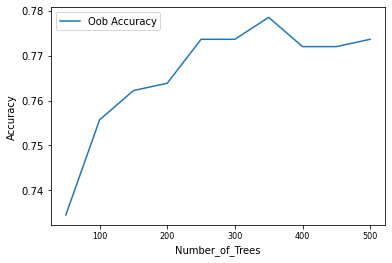

In [12]:
fig=plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(df['Number_of_Trees'].values,df['Oob Accuracy'].values,label = 'Oob Accuracy')
ax.set_xlabel('Number_of_Trees')
ax.set_ylabel('Accuracy')
ax.tick_params(axis='x', labelsize=8)
ax.legend(loc='best')

In [13]:
#Although we picked 350, we could have picked a bigger number. Higher Number of trees do not lead to overfitting
clf=RandomForestClassifier(random_state=0,n_estimators=350,oob_score=True)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7662337662337663

In [14]:
#Let's try different numbers of features at each split (default is sqrt(p) where p is the number of features)
Oob_Accuracy=[]
for i in range(1,9):
    clf=RandomForestClassifier(random_state=0,n_estimators=350,max_features=i,oob_score=True)
    clf.fit(X_train,y_train)
    Oob_Accuracy.append([i,np.array(clf.oob_score_)])
df = pd.DataFrame(Oob_Accuracy,columns=['Number_of_Features','Oob Accuracy'])
df

,Number_of_Features,Oob Accuracy
0,1,0.7719869706840391
1,2,0.7785016286644951
2,3,0.7899022801302932
3,4,0.7785016286644951
4,5,0.7736156351791531
5,6,0.7736156351791531
6,7,0.7654723127035831
7,8,0.7785016286644951


In [15]:
clf=RandomForestClassifier(random_state=0,n_estimators=350,max_features=3,oob_score=True)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Test Accuracy:', accuracy_score(y_test, y_pred))

Test Accuracy: 0.7532467532467533


In [16]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10,stratify=y)

In [17]:
Oob_Accuracy=[]
for i in range(1,9):
    clf=RandomForestClassifier(random_state=0,n_estimators=350,max_features=i,oob_score=True)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    Oob_Accuracy.append([i,np.array(clf.oob_score_)])
df = pd.DataFrame(Oob_Accuracy,columns=['Number_of_Features','Oob Accuracy'])
df

,Number_of_Features,Oob Accuracy
0,1,0.754071661237785
1,2,0.758957654723127
2,3,0.7687296416938111
3,4,0.760586319218241
4,5,0.754071661237785
5,6,0.7719869706840391
6,7,0.758957654723127
7,8,0.760586319218241


In [18]:
clf=RandomForestClassifier(random_state=0,n_estimators=350,max_features=6,oob_score=True)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Test Accuracy:', accuracy_score(y_test, y_pred))

Test Accuracy: 0.7857142857142857


In [19]:
clf=RandomForestClassifier(random_state=0)
# number of trees in random forest
n_estimators = [100,200,300,400,500,600]
# number of features at every split
max_features = [1,2,3,4,5,6,7,8]
# create grid
params = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 }
params

{'n_estimators': [100, 200, 300, 400, 500, 600],
 'max_features': [1, 2, 3, 4, 5, 6, 7, 8]}

In [20]:
# Grid search of parameters
clf_grid = GridSearchCV(estimator = clf, param_grid = params, 
                                cv = 5, verbose=2, scoring='accuracy',n_jobs = -1)
# Fit the model
clf_grid.fit(X_train, y_train)
# print results
print(clf_grid.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
{'max_features': 4, 'n_estimators': 300}


In [21]:
clf=RandomForestClassifier(random_state=0,n_estimators=300,max_features=4,oob_score=True)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Test Accuracy:', accuracy_score(y_test, y_pred))

Test Accuracy: 0.7857142857142857


In [22]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1,stratify=y)

In [23]:
# Grid search of parameters
clf_grid = GridSearchCV(estimator = clf, param_grid = params, 
                                cv = 5, verbose=2, scoring='accuracy',n_jobs = -1)
# Fit the model
clf_grid.fit(X_train, y_train)
# print results
print(clf_grid.best_params_)
#The results are different :) This will always happen because there is variability due to a change in training and test sets

Fitting 5 folds for each of 48 candidates, totalling 240 fits
{'max_features': 6, 'n_estimators': 100}


In [24]:
clf=RandomForestClassifier(random_state=0,n_estimators=100,max_features=6,oob_score=True)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Test Accuracy:', accuracy_score(y_test, y_pred))

Test Accuracy: 0.7532467532467533


In [25]:
clf=RandomForestClassifier(random_state=0)
# number of trees in random forest
n_estimators = [100,200,300,400,500,600]
# number of features at every split
max_features = [1,2,3,4,5,6,7,8]
# create grid
params = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 }
#Instead of one test set we will use cross validation, please note that both parameter selection and 
#the test performance is computed via cross validation (a nested cross-validation) 
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, random_state=1, shuffle=True)
CVErrors=[]
for train_index, validation_index in cv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[validation_index], 
    y_train, y_test = y.iloc[train_index], y.iloc[validation_index]
    # Grid search of parameters
    clf_grid = GridSearchCV(estimator = clf, param_grid = params, 
                                cv = 5, verbose=2, scoring='accuracy',n_jobs = -1)
    # Fit the model
    clf_grid.fit(X_train, y_train)
    # print results
    print(clf_grid.best_params_)
    #After finding best parameters fit the model
    clf=RandomForestClassifier(**clf_grid.best_params_)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    #Test the performance on the test set
    CVErrors.append(accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
{'max_features': 1, 'n_estimators': 600}
Fitting 5 folds for each of 48 candidates, totalling 240 fits
{'max_features': 2, 'n_estimators': 300}
Fitting 5 folds for each of 48 candidates, totalling 240 fits
{'max_features': 2, 'n_estimators': 100}
Fitting 5 folds for each of 48 candidates, totalling 240 fits
{'max_features': 1, 'n_estimators': 300}
Fitting 5 folds for each of 48 candidates, totalling 240 fits
{'max_features': 3, 'n_estimators': 200}


In [26]:
CVErrors

[0.8051948051948052,
 0.7467532467532467,
 0.7532467532467533,
 0.7973856209150327,
 0.6993464052287581]

In [27]:
np.mean(CVErrors)

0.7603853662677192

In [28]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1,stratify=y)

In [29]:
# Grid search of parameters
clf_grid = GridSearchCV(estimator = clf, param_grid = params, 
                                cv = 5, verbose=2, scoring='roc_auc',n_jobs = -1)
# Fit the model
clf_grid.fit(X_train, y_train)
# print results
print(clf_grid.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
{'max_features': 2, 'n_estimators': 500}


In [30]:
clf=RandomForestClassifier(random_state=0,n_estimators=200,max_features=2,oob_score=True)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[87, 13],
       [23, 31]])

In [31]:
clf=RandomForestClassifier(random_state=0,n_estimators=200,max_features=2,oob_score=True)
clf.fit(X_train,y_train)
y_pred_proba=np.array(clf.predict_proba(X_test))
y_pred_proba

array([[0.97 , 0.03 ],
       [0.91 , 0.09 ],
       [0.89 , 0.11 ],
       [0.615, 0.385],
       [0.56 , 0.44 ],
       [0.7  , 0.3  ],
       [0.985, 0.015],
       [0.96 , 0.04 ],
       [0.255, 0.745],
       [0.965, 0.035],
       [0.765, 0.235],
       [0.965, 0.035],
       [0.35 , 0.65 ],
       [0.98 , 0.02 ],
       [0.985, 0.015],
       [0.54 , 0.46 ],
       [0.815, 0.185],
       [0.475, 0.525],
       [0.925, 0.075],
       [0.44 , 0.56 ],
       [0.165, 0.835],
       [0.87 , 0.13 ],
       [0.765, 0.235],
       [0.83 , 0.17 ],
       [0.465, 0.535],
       [0.495, 0.505],
       [0.585, 0.415],
       [0.93 , 0.07 ],
       [0.98 , 0.02 ],
       [0.725, 0.275],
       [0.945, 0.055],
       [0.91 , 0.09 ],
       [0.77 , 0.23 ],
       [0.835, 0.165],
       [0.23 , 0.77 ],
       [0.28 , 0.72 ],
       [0.62 , 0.38 ],
       [0.14 , 0.86 ],
       [0.83 , 0.17 ],
       [0.735, 0.265],
       [0.905, 0.095],
       [0.43 , 0.57 ],
       [0.68 , 0.32 ],
       [0.7

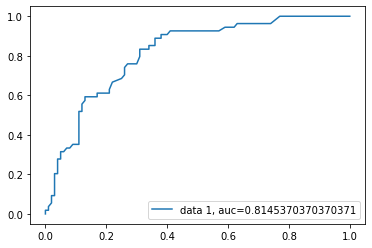

In [32]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:,1])
auc = roc_auc_score(y_test, y_pred_proba[:,1])
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [33]:
clf.feature_importances_

array([0.08431491, 0.25003872, 0.09151941, 0.06804153, 0.0741019 ,
       0.15800613, 0.13643191, 0.13754548])

In [34]:
# Plot the impurity-based feature importances of the forest
feats = {} # a dict to hold feature_name: feature_importance
importances = clf.feature_importances_
clf.feature_importances_

array([0.08431491, 0.25003872, 0.09151941, 0.06804153, 0.0741019 ,
       0.15800613, 0.13643191, 0.13754548])

<AxesSubplot:>

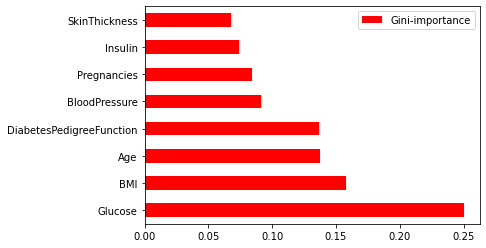

In [35]:
for feature, importance in zip(X_col, clf.feature_importances_):
    feats[feature] = importance #add the name/value pair 
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances = importances.sort_values(by='Gini-importance',ascending=False)
importances.plot.barh(color='r')

In [36]:
clf=LogisticRegression(solver='liblinear')
C_param_range = [0.001,0.01,0.1,1,10,100,1000,10000]
penalties=['l1','l2']
# create grid
params = {
 'C': C_param_range,
 'penalty': penalties,
 }

clf_grid = GridSearchCV(estimator = clf, param_grid = params, 
                                cv = 5, verbose=2, scoring='roc_auc',n_jobs = -1)
# Fit the model
clf_grid.fit(X_train, y_train)
# print results
print(clf_grid.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
{'C': 1000, 'penalty': 'l2'}


In [37]:
clf=LogisticRegression(C=1000,penalty='l2',solver='liblinear')
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Test Accuracy:', accuracy_score(y_test, y_pred))

Test Accuracy: 0.7857142857142857


In [38]:
df = pd.read_csv('Hitters_Data.csv')
df=df.dropna()
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [39]:
dummies = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = np.log(df.Salary)

# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')

# Define the feature set X.
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)

In [40]:
X

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497.0,127.0,7.0,65.0,48.0,37.0,5.0,2703.0,806.0,32.0,379.0,311.0,138.0,325.0,9.0,3.0,1,0,1
318,492.0,136.0,5.0,76.0,50.0,94.0,12.0,5511.0,1511.0,39.0,897.0,451.0,875.0,313.0,381.0,20.0,0,0,0
319,475.0,126.0,3.0,61.0,43.0,52.0,6.0,1700.0,433.0,7.0,217.0,93.0,146.0,37.0,113.0,7.0,0,1,0
320,573.0,144.0,9.0,85.0,60.0,78.0,8.0,3198.0,857.0,97.0,470.0,420.0,332.0,1314.0,131.0,12.0,0,0,0


In [41]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_trainStandard = scaler.transform(X_train)
X_testStandard = scaler.transform(X_test)

In [42]:
X_testStandard

array([[-0.76808384, -0.60470869,  0.20274045, ..., -1.        ,
         0.99052111, -0.9626035 ],
       [-1.06641053, -1.01143446, -1.3519827 , ..., -1.        ,
        -1.0095696 , -0.9626035 ],
       [ 0.67498477,  0.97700265,  0.32233454, ..., -1.        ,
        -1.0095696 ,  1.03884933],
       ...,
       [-1.46880466, -1.44075611, -1.23238861, ..., -1.        ,
        -1.0095696 , -0.9626035 ],
       [ 0.23096366,  0.09576348, -0.99320043, ..., -1.        ,
         0.99052111,  1.03884933],
       [ 1.00106278,  0.95440677,  1.39868134, ...,  1.        ,
        -1.0095696 ,  1.03884933]])

In [48]:
from sklearn.pipeline import Pipeline
a=RandomForestRegressor(random_state=0)
# number of trees in random forest
n_estimators = [100,200,300,400,500,600]
# number of features at every split
max_features = [3,4,5,6,7]
# create grid
params = {
 'a__n_estimators': n_estimators,
 'a__max_features': max_features,
 }

pipe = Pipeline([('scaler',preprocessing.StandardScaler()),('a', a)])

# Random search of parameters
clf_grid = GridSearchCV(estimator = pipe, param_grid = params, 
                                cv = 5, verbose=2, scoring='neg_mean_squared_error',n_jobs = -1)
# Fit the model
clf_grid.fit(X_train, y_train)
# print results
print(clf_grid.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
{'a__max_features': 3, 'a__n_estimators': 300}


In [44]:
clf=RandomForestRegressor(random_state=0,n_estimators=300,max_features=3)
clf.fit(X_trainStandard,y_train)
y_pred=clf.predict(X_testStandard)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

Mean Squared Error: 0.15424688036594958


In [45]:
from sklearn.pipeline import Pipeline
# Create a pipeline
pipe = Pipeline([('scaler', preprocessing.StandardScaler()),('Regressor',RandomForestRegressor())])

# Create space of candidate learning algorithms and their hyperparameters
search_space = [{'Regressor': [Ridge()],
                 'Regressor__alpha': np.logspace(-3, 1, 10)},
                {'Regressor': [Lasso(max_iter = 10000)],
                 'Regressor__alpha': np.logspace(-3, 1, 10)},
                {'Regressor': [KNeighborsRegressor()],
                 'Regressor__n_neighbors':[2,3,4,5,6]},
                {'Regressor': [RandomForestRegressor(random_state=0)],
                 'Regressor__n_estimators': [100, 200,300,400,500],
                 'Regressor__max_features': [3,4,5,6,7]}]

# Create grid search 
clf = GridSearchCV(pipe, search_space, cv=5, verbose=0,scoring='neg_mean_squared_error')
# Fit grid search
best_model = clf.fit(X_train, y_train)
# View best model
best_model.best_estimator_.get_params()['Regressor']

RandomForestRegressor(max_features=3, n_estimators=300, random_state=0)

In [46]:
clf=RandomForestRegressor(random_state=0,n_estimators=300,max_features=3)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_trainStandard,y_train)
y_pred=clf.predict(X_testStandard)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

Mean Squared Error: 0.15424688036594958
